# Notebook to analyze features
- To analyze features for certain utterances from some spesific persons. Can be used to analyse a spesific person from t.d a fold or experiment we want more information about.  
- Advantageus to investigate the waveforms, and images from the feature extraction process. 


- Used to extract features based on a specific waveform. Can also be used for self made recordings. 

### Imports 

In [1]:
import os
import sys
import warnings

from IPython.display import Audio

from disvoice.articulation.articulation import Articulation
from disvoice.phonation.phonation import Phonation
from disvoice.prosody.prosody import Prosody


from constants import *
from GITA_wav_paths import * # DDK, words, sentences and monologue and vowels:
import pandas as pd

import matplotlib.pyplot as plt


sys.path.append("../")


os.environ['KALDI_ROOT']=personal_path_to_kaldi # Set kaldi environment 


# warnings.filterwarnings("ignore", category=RuntimeWarning)   # Warning that creates NaN values (mostly for prosody). 
plt.rcParams['font.family'] = 'DeJavu Serif' # To remove warning about font for plotting not being defined. 
warnings.filterwarnings("ignore", category=UserWarning) # Ignore userwarning about color being not needed to be defined. 





################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################

2024-06-27 15:04:48.087745: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 15:04:48.087797: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-27 15:04:48.089257: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS

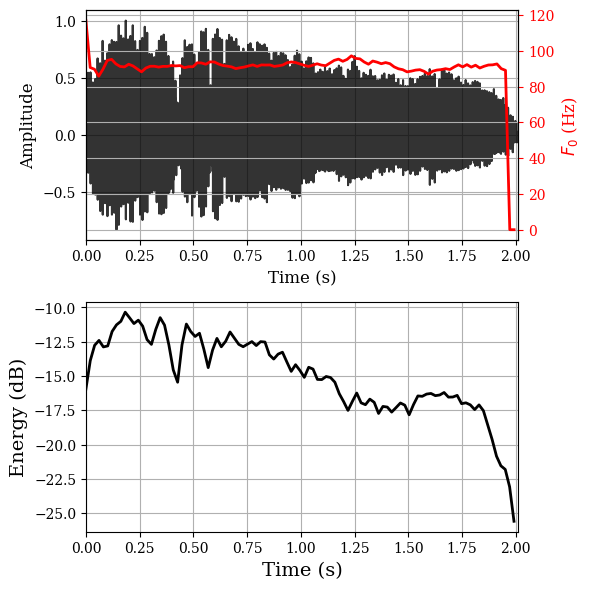

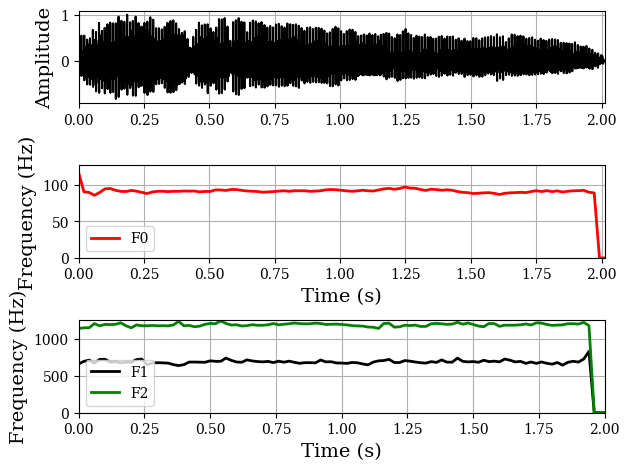

/home/malinre/miniconda3/envs/disenv/lib/python3.11/site-packages/disvoice/prosody/prosody_functions.py:47: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tiltskw=st.skew(np.asarray(tilt))
/home/malinre/miniconda3/envs/disenv/lib/python3.11/site-packages/disvoice/prosody/prosody_functions.py:48: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  mseskw=st.skew(np.asarray(mse))
/home/malinre/miniconda3/envs/disenv/lib/python3.11/site-packages/disvoice/prosody/prosody_functions.py:49: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tiltku=st.kurtosis(np.asarray(tilt))
/home/malinre/miniconda3/envs/disenv/lib/python3.11/si

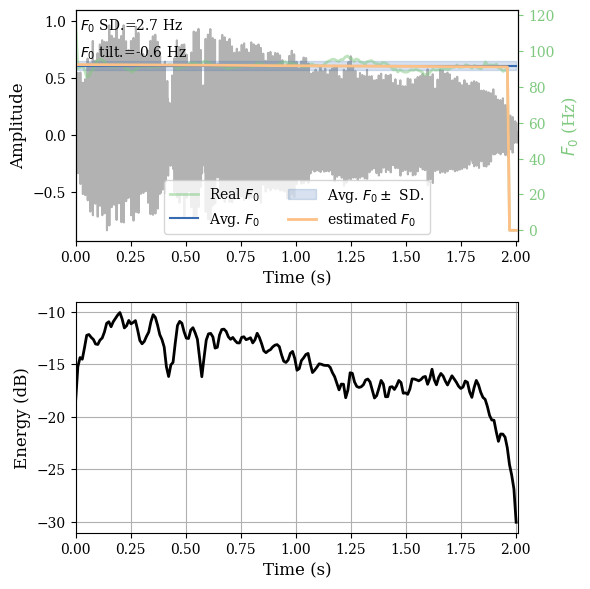

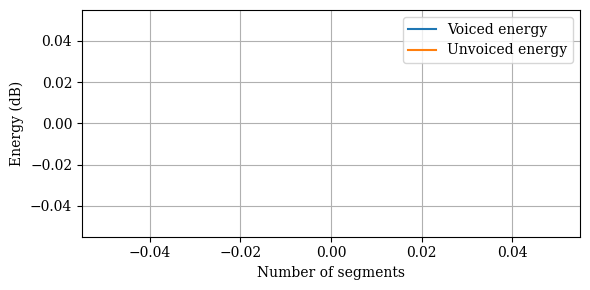

0    91.698982
Name: F0avg, dtype: float64

,0
avg DF0,-0.283530
avg DDF0,0.260278
avg Jitter,1.051029
avg Shimmer,3.405662
avg apq,4.767763
...,...
PU,0.000000
UVU,0.000000
VVU,0.000000
VP,0.000000


In [12]:
wav_path = "/home/malinre/master-thesis/PC-GITA-v2-mod/PC-GITA_per_task_16000Hz/Vowels/Patologicas/A/AVPEPUDEA0001_a1.wav"
# file = "/home/malinre/master-thesis/Master-thesis-code/record_short.wav" # My own voice 


display(Audio(wav_path,autoplay=False)) 

phonationf = Phonation()
articulationf=Articulation()
prosodyf=Prosody()


features_phonation=phonationf.extract_features_file(wav_path, static=True, plots=True, fmt="csv") 
features_articulation=articulationf.extract_features_file(wav_path, static=True, plots=True, fmt="csv")
features_prosody=prosodyf.extract_features_file(wav_path, static=True, plots=True, fmt="csv")


all_features = pd.concat([features_phonation, features_articulation, features_prosody], axis = 1)
transposed = all_features.transpose() # For easier reading 
display(all_features["F0avg"])

display(transposed)

with open(personal_path_to_code + "/VOWEL_ZERO", 'w') as f:
    f.write(transposed.to_string(header=False, index=True))